In [1]:
import os
os.chdir("../../..")
import deepof.data

In [2]:
%load_ext autoreload
%autoreload 2

# Formatting your data: feature extraction from motion tracking output

In [3]:
# Create and run a project. Explore different processing parameters (smoothing, imputation)

In [4]:
my_deepof_project = deepof.data.Project(
                path=os.path.join("../../Desktop/deepOF_CSDS_tutorial_dataset/"),
                arena="circular-manual",
                animal_ids=["B", "W"],
                video_format=".mp4",
                exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
                video_scale=380,
                enable_iterative_imputation=True,
                exp_conditions={
                    '20191204_Day2_SI_JB08_Test_56': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_61': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_62': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_54': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_63': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_64': 'Nonstressed'
                }
)

# Set manually the edge in the polygons that we're measuring

In [6]:
# my_deepof_project = my_deepof_project.run()

In [7]:
# Save your project to avoid laborious repetitions

In [ ]:
my_deepof_project.save("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_coordinates")

In [8]:
# Load a previously saved project
my_deepof_project = deepof.data.load("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_coordinates_1667951748.pkl")

In [9]:
# TODO: average all selected videos
# TODO: Operate with videos (ie substract one averaged condition from another)

/Users/lucas_miranda/Library/Caches/pypoetry/virtualenvs/deepof-qxwF8hwh-py3.9/lib/python3.9/site-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


TypeError: only size-1 arrays can be converted to Python scalars

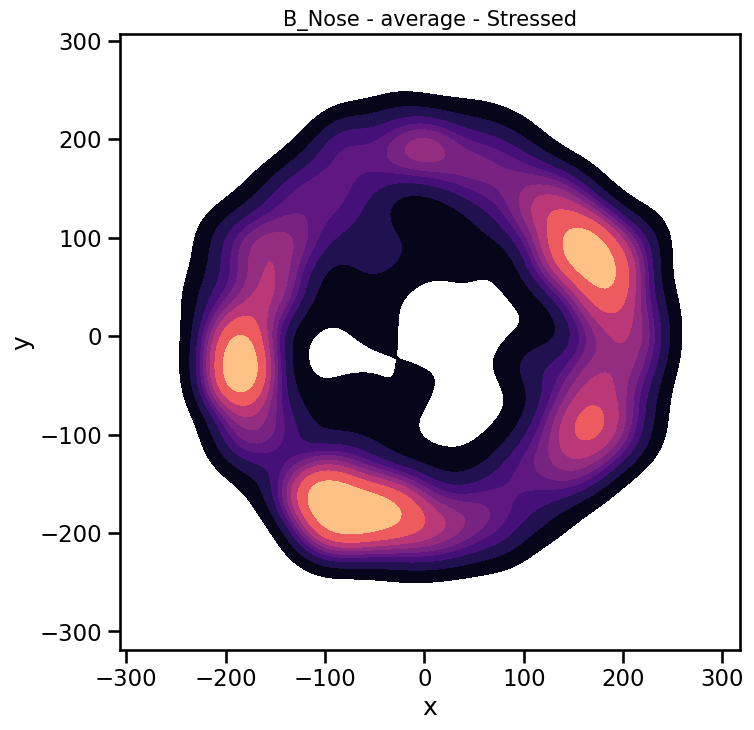

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import deepof.visuals
from matplotlib.patches import Ellipse

sns.set_context("talk")

# Remaining tasks:
# 1) Index video by name instead of number
# 2) Average heatmaps for all passed videos if more than 1
# 2) Substract averages per condition if requested      1qqw2ertyu

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"], 
    center="arena", 
    exp_condition="Stressed", 
    show=False
)
deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"], 
    center="arena", 
    exp_condition="Nonstressed", 
    show=False
)

plt.tight_layout()
plt.show()

In [11]:
# Explore and visualize the data as heatmaps (heatmaps)
# Plot static and animated trajectories (skeleton-based)
# Plot static and animated embeddings (PCA, raw UMAP)

In [12]:
from sklearn.decomposition import PCA
emb = PCA(n_components=10).fit_transform(my_deepof_project.get_coords()['20191204_Day2_SI_JB08_Test_56'])

In [85]:
import numpy as np

np.array([i[0] for i in my_deepof_project._arena_params])

array([[293, 299],
       [336, 311],
       [285, 288],
       [294, 304],
       [350, 306],
       [336, 316]])

In [53]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embedding=emb[:2000],
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=2000,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

# TODO: Fix colors! and add legened

In [ ]:
# Get and plot coordinates, distances, angles, and areas. Try and visualizing different centering and rotations

In [ ]:
# Show how to merge different feature objects

In [50]:
c._exp_conditions.values()

dict_values(['Stressed', 'Stressed', 'Stressed', 'Nonstressed', 'Nonstressed', 'Nonstressed'])

In [68]:
# from sklearn.preprocessing import LabelEncoder

# c = my_deepof_project.get_coords()
# deepof.visuals.plot_embeddings(
#     c.pca()[0], cluster_assignments=LabelEncoder().fit_transform(list(c._exp_conditions.values())), dpi=100,
    
# )